In [1]:
def generate_random(seed, coefficients, range_start, range_end):
    """
    Parameters:
        seed (int): The initial seed value.
        coefficients (list): Coefficients of the linear recurrence relation.
        range_start (int): Start of the desired range (inclusive).
        range_end (int): End of the desired range (inclusive).

    Returns:
        int: Generated random number within the specified range.
    """
    current_value = seed
    
    new_value = sum(coeff * current_value for coeff in coefficients)
    new_value = (new_value % (range_end - range_start + 1)) + range_start
    
    return int(new_value)

# Define the parameters for the linear recurrence relation and the desired range
seed_value = 123
coefficients = [0.3, 0.5, -0.2]
desired_range_start = 1
desired_range_end = 100

# Generate a single random number within the specified range using the linear recurrence relation
random_number = (generate_random(seed_value, coefficients, desired_range_start, desired_range_end))
print("Generated random number within the range:", random_number)

Generated random number within the range: 74


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## handling image data

In [2]:
from PIL import Image, ImageFilter, ImageOps, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# image = Image.open('C:\\Users\\richa\\Downloads\\archive (1)\\IMAGE_DATA\\IMAGE_DATA\\AIRPLANE\\images (10).jpeg')
# image.show()
# gray = image.convert('L')
# gray.show()

In [4]:
#1
def count_files(dir_path):
    file_count = 0
    for root, dirs, files in os.walk(dir_path):
        file_count += len(files)
    return file_count

Number of files in 'AIRPLANE': 20
Number of files in 'CARS': 20
Number of files in 'ELEPHANTS': 39
Number of files in 'RANDOM': 20
Number of files in 'ROBOTS': 21


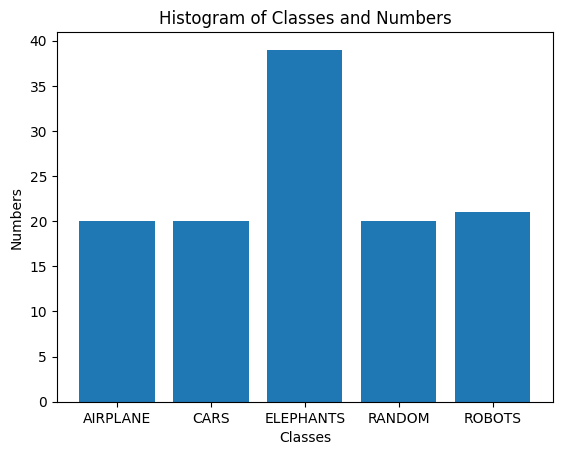

In [6]:
directory_path = '/content/drive/MyDrive/A1_data/IMAGE_DATA/IMAGE_DATA'
image_classes = []
image_count = []
# List all files and directories in the given path
contents = os.listdir(directory_path)
for item in contents:
    # print(item)
    image_classes.append(item)
    num_files = count_files(os.path.join(directory_path ,item))
    image_count.append(num_files)
    print(f"Number of files in '{item}': {num_files}")
plt.bar(image_classes, image_count)
plt.xlabel('Classes')
plt.ylabel('Numbers')
plt.title('Histogram of Classes and Numbers')
plt.show()

#### For Q1: elephant is imbalanced as it has more images than other classes. We can use undersampling or oversampling to balance the dataset. Here we are using undersampling to balance the dataset as it is computationally less expensive than oversampling and only 2 classes are imbalanced out of 5 classes. So after undersampling, all classes have 20 images

In [7]:
# saving original data in numpy array
# Directory containing class subdirectories
dataset_dir = '/content/drive/MyDrive/A1_data/IMAGE_DATA/IMAGE_DATA'

# List all class subdirectories
class_dirs = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
# Initialize lists to store images and labels
original_images = []
original_labels = []
# dictionary to store class labels
class_labels = {}

# Load images and labels
for class_label, class_dir in enumerate(class_dirs):
    class_labels[class_label] = class_dir
    class_path = os.path.join(dataset_dir, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        image = Image.open(img_path)
        # convert images to grayscale
        image = image.convert('L')
        image = image.resize((100, 100))  # Resize images to desired dimensions
        image_array = np.array(image)
        original_images.append(image_array)
        original_labels.append(class_label)

# Convert lists to NumPy arrays
images_array = np.array(original_images)
labels_array = np.array(original_labels)

# Display array shapes
print("Images shape:", images_array.shape)
print("Labels shape:", labels_array.shape) 

Images shape: (120, 100, 100)
Labels shape: (120,)


#### Q2: randomly pick an integer between 0 and 120 8 times and plot its histogram

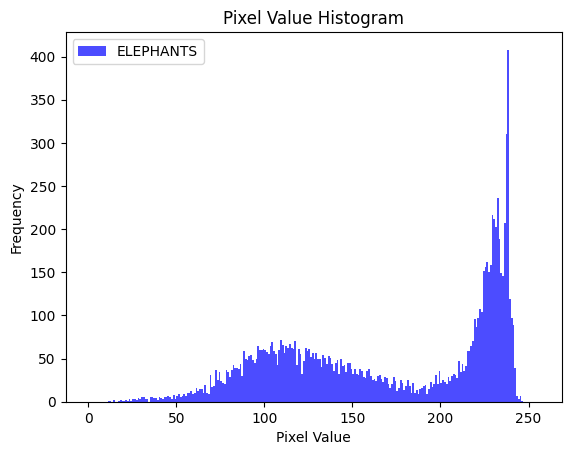

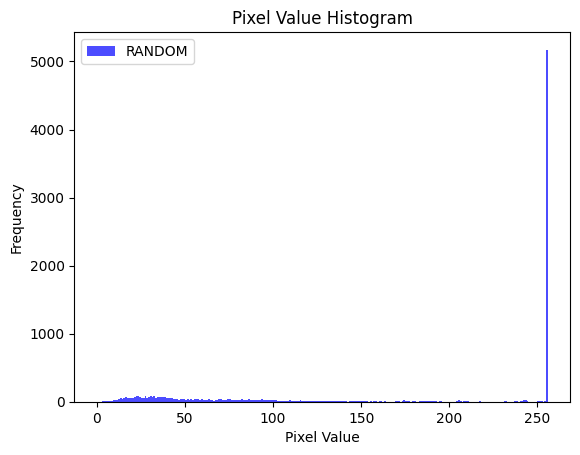

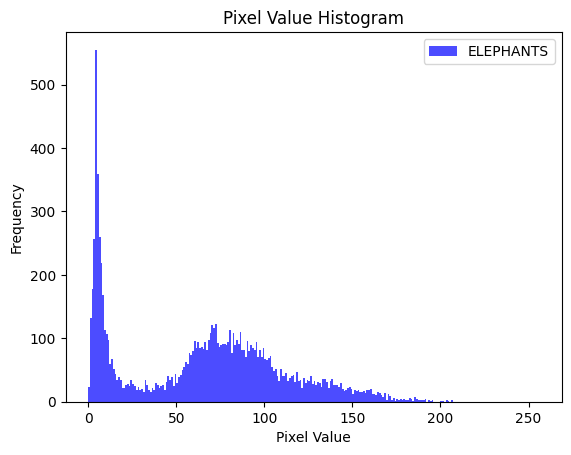

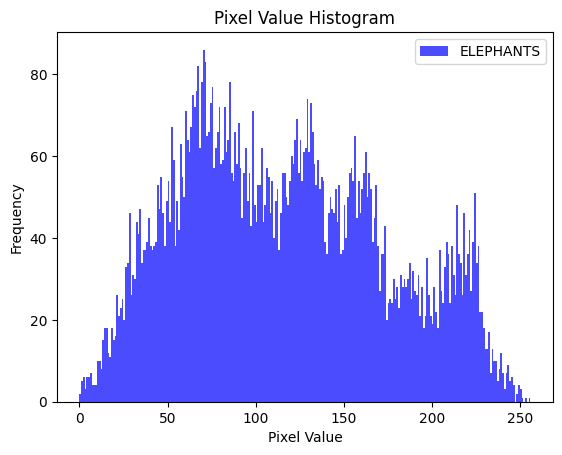

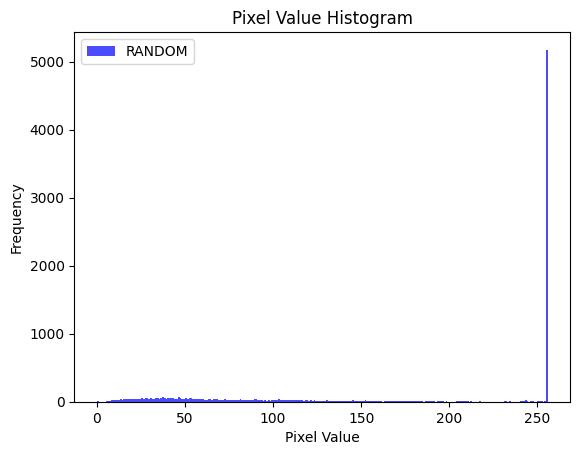

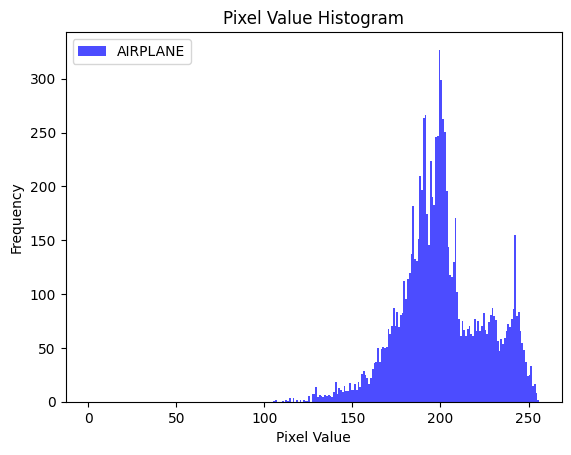

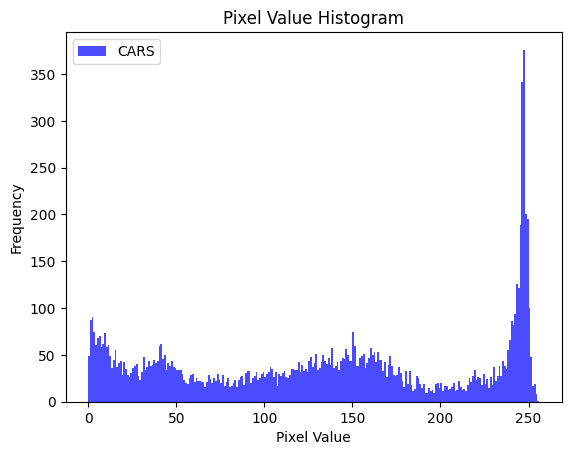

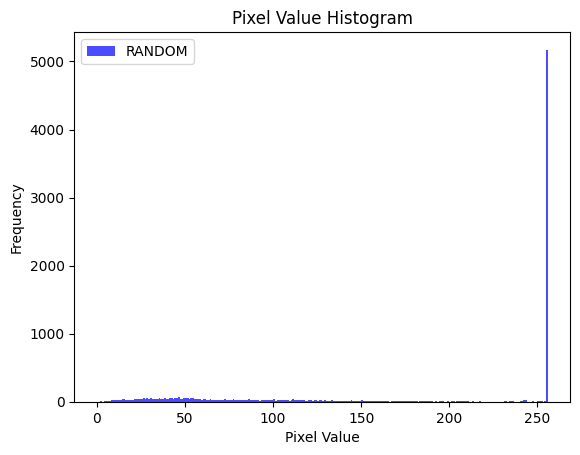

In [8]:

import random
for i in range(8):
    random_int = random.randint(0,119)
    # print(images_array[random_int])
    # plt.imshow(images_array[random_int], cmap='gray')
    # plot histogram of 
    image_array = images_array[random_int]
    image_class = labels_array[random_int]
    # Flatten the image array to a 1D array of pixel values
    pixel_values = image_array.flatten()

    # Plot the histogram and show legend

    plt.hist(pixel_values, bins=256, range=(0, 256), density=False, color='blue', alpha=0.7)
    plt.legend([class_labels[image_class]])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Pixel Value Histogram')
    plt.show()

#### since the image is greyscaled, there are no different pixel values for different channels as we are using only one channel

In [9]:
image_dict = {} # dictionary which stores class labels as keys and images as values
counter = 0
classmapping = {}
# Load images and labels
for class_label, class_dir in enumerate(class_dirs):
    image_dict[counter] = []
    class_path = os.path.join(dataset_dir, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        image = Image.open(img_path)
        # convert images to grayscale
        image = image.convert('L')
        # image = image.resize((100, 100))  # Resize images to desired dimensions
        image_array = np.array(image)
        image_dict[counter].append(image_array)
        classmapping[counter] = class_dir
    counter += 1

#### Q3 find the mean and variance of the grayscaled images in the dataset
### The mean of the image data is the average value of all pixel intensities in the image. The variance of the image measures the spread of the pixel intensities around the mean.
#### A high mean indicates the image has more white pixels on an average, and a low mean indicates the image has more black pixels on an average. A high variance indicates that the pixel intensities are spread out over a wider range of values, and a low variance indicates that the pixel intensities are concentrated in a narrow range of values.

In [10]:
means = np.zeros(5)
variances = np.zeros(5)
for label,image in image_dict.items():
    # print(label)
    #get variance and mean for each class
    for i in range(len(image)):
        means[label] += np.mean(image[i])
        variances[label] += np.var(image[i])
    means[label] = means[label]/len(image)
    variances[label] = variances[label]/len(image)
print(classmapping)
print(means)
print(variances)

{0: 'AIRPLANE', 1: 'CARS', 2: 'ELEPHANTS', 3: 'RANDOM', 4: 'ROBOTS'}
[135.86338627 110.79987561 129.53748151 168.8509484  157.48657178]
[ 2396.88083969  4538.1616163   2973.21536804 10672.25849943
  4324.0531771 ]


#### Q4 standardise the image data, print the image before and after standardisation
#### standardisation helps us compare the pixel intensities of different images in the dataset. 
#### I have set the mean to 0 and variance to 1 by subtracting the mean from each pixel intensity and dividing it by the standard deviation of the pixel intensities

Images from class: RANDOM before standardization


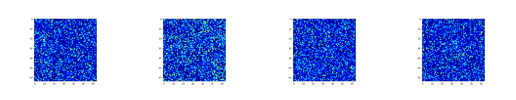

Images from class: RANDOM after standardization


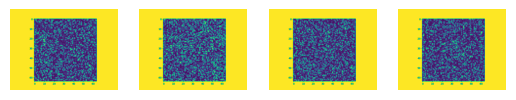

In [11]:
image_files = os.listdir('/content/drive/MyDrive/A1_data/IMAGE_DATA/IMAGE_DATA/RANDOM')

imgs_to_show = 4
for i in range(imgs_to_show):
    img_file = image_files[i]
    # print(img_file)
    img_path = os.path.join('/content/drive/MyDrive/A1_data/IMAGE_DATA/IMAGE_DATA/RANDOM', img_file)
    # print(img_path)
    image = Image.open(img_path)
    
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)
    plt.axis('off')
print('Images from class: RANDOM before standardization')
plt.show()
print('Images from class: RANDOM after standardization')
for i in range(imgs_to_show):
    image = image_dict[3][i] # accessing images from class RANDOM
    # standardize image
    image = (image - np.mean(image)) / np.std(image)
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)
    plt.axis('off')

#### Q5 perform transformation of 12 random images, print the image before and after transformation
#### order of images in plot: original, rotated, cropped, scaled

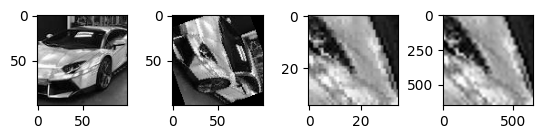

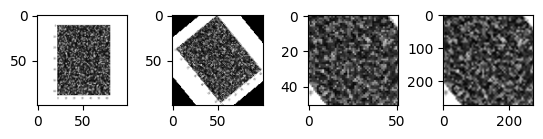

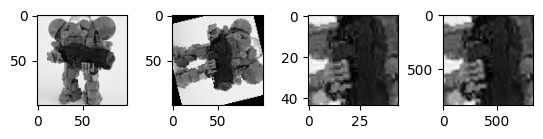

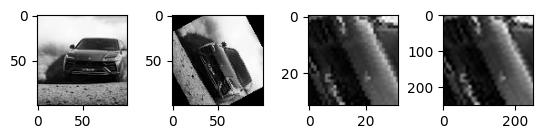

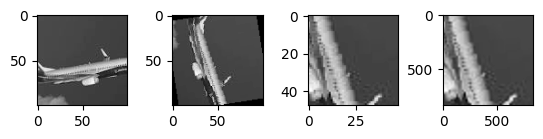

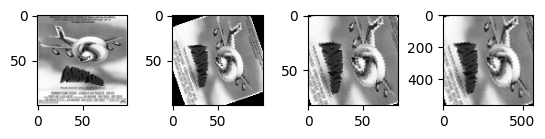

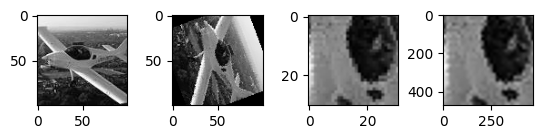

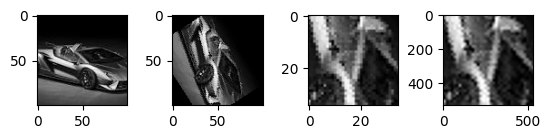

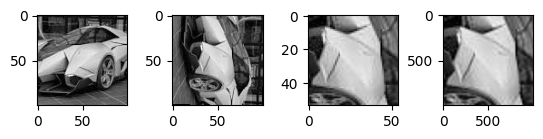

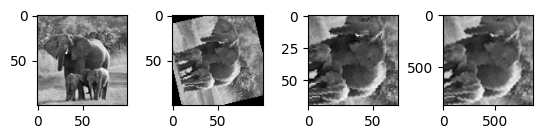

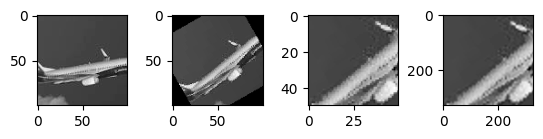

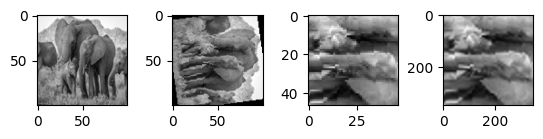

In [12]:
rotation_angle_range = (-100, 100) 
crop_percent_range = (0.3, 1.0)  
scale_range = (5, 20)

# randomly pick an integer between 0 and 119 12 times and transform the image and plot it
for i in range(12):
    random_int = random.randint(0,119)
    # print(images_array[random_int])
    # rotate image
    rotation_angle = random.uniform(*rotation_angle_range)
    rotated_image = Image.fromarray(images_array[random_int]).rotate(rotation_angle)
    # crop image
    crop_percent = random.uniform(*crop_percent_range)
    crop_width = int(crop_percent * rotated_image.size[0])
    crop_height = int(crop_percent * rotated_image.size[1])
    crop_left = int((rotated_image.size[0] - crop_width) / 2)
    crop_top = int((rotated_image.size[1] - crop_height) / 2)
    crop_box = (crop_left, crop_top, crop_left + crop_width, crop_top + crop_height)
    cropped_image = rotated_image.crop(crop_box)
    # scale image
    scale = random.uniform(*scale_range)
    scaled_image = cropped_image.resize((int(cropped_image.size[0] * scale), int(cropped_image.size[1] * scale)))
    # plot rotated, cropped and scaled image together with a legend
    plt.subplot(1, 4, 2)
    plt.imshow(rotated_image, cmap='gray', label='rotated')
    plt.subplot(1, 4, 3)
    plt.imshow(cropped_image, cmap='gray', label='cropped')
    plt.subplot(1, 4, 4)
    plt.imshow(scaled_image, cmap='gray', label='scaled')
    plt.subplot(1, 4, 1)
    plt.imshow(images_array[random_int], cmap='gray', label='original')
    plt.subplots_adjust(wspace=0.5)
    # plt.legend()
    plt.show()